In [72]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("C:/Users/User/Python projects/AI/Datasets/House_Rent_Dataset.csv")

In [31]:
df = df.drop(["Posted On", "Floor", "Area Locality", "City", "Tenant Preferred", "Point of Contact"], axis=1)

In [32]:
df = df.drop(["BHK"], axis=1)

In [33]:
df.head()

,Rent,Size,Area Type,Furnishing Status,Bathroom
0,10000,1100,Super Area,Unfurnished,2
1,20000,800,Super Area,Semi-Furnished,1
2,17000,1000,Super Area,Semi-Furnished,1
3,10000,800,Super Area,Unfurnished,1
4,7500,850,Carpet Area,Unfurnished,1


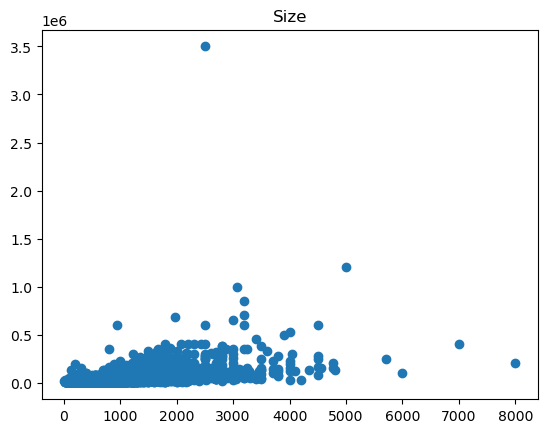

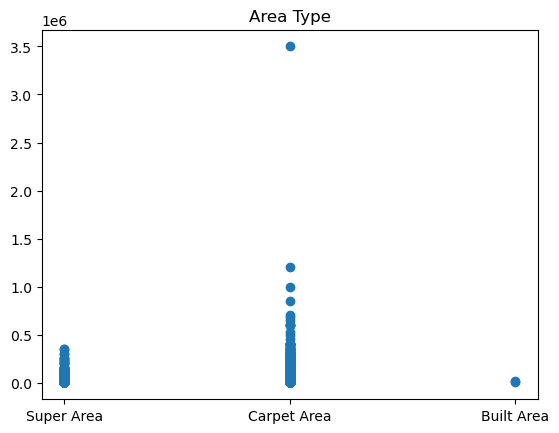

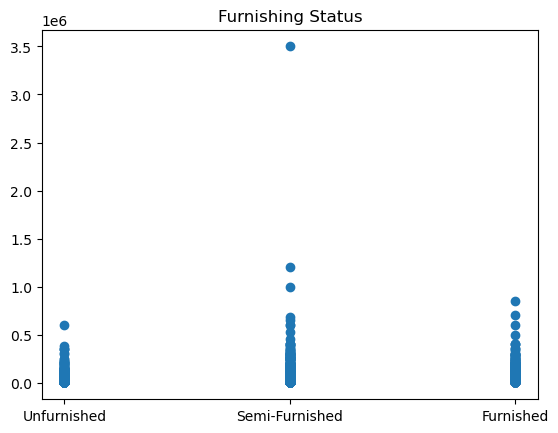

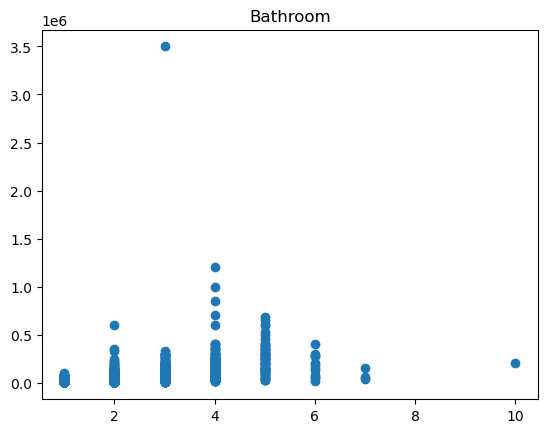

In [25]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["Rent"])
    plt.title(label)
    plt.show()

In [34]:
one_hot = pd.get_dummies(df["Area Type"])

In [35]:
one_hot2 = pd.get_dummies(df["Furnishing Status"])

In [36]:
df = pd.concat([df, one_hot, one_hot2], axis=1)

In [48]:
df = df.drop(["Area Type", "Furnishing Status"], axis=1)

In [50]:
df = df.apply(lambda x: (x) / (x.max(axis=0)))

In [63]:
Y = df[["Rent"]]
X = df[df.columns[1:]]

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [94]:
X_test = X_test["Size"]

In [106]:
model = tf.keras.models.Sequential()
model.add(Dense(units=1, input_shape=(1,)))

In [111]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=.005), loss="mean_squared_error")

In [112]:
model.fit(X_train, Y_train, epochs=101, batch_size=16, validation_split=0.3)

Train on 2657 samples, validate on 1139 samples
Epoch 1/101
2657/2657 [==============================] - 1s 213us/sample - loss: 2.6790e-04 - val_loss: 0.0011
Epoch 2/101
2657/2657 [==============================] - 0s 98us/sample - loss: 2.6471e-04 - val_loss: 0.0011
Epoch 3/101
2657/2657 [==============================] - 0s 94us/sample - loss: 2.6738e-04 - val_loss: 0.0010
Epoch 4/101
2657/2657 [==============================] - 0s 95us/sample - loss: 2.6901e-04 - val_loss: 0.0010
Epoch 5/101
2657/2657 [==============================] - 0s 98us/sample - loss: 2.6972e-04 - val_loss: 0.0010
Epoch 6/101
2657/2657 [==============================] - 0s 93us/sample - loss: 2.6782e-04 - val_loss: 0.0010
Epoch 7/101
2657/2657 [==============================] - 0s 94us/sample - loss: 2.6648e-04 - val_loss: 0.0011
Epoch 8/101
2657/2657 [==============================] - 0s 97us/sample - loss: 2.7023e-04 - val_loss: 0.0011
Epoch 9/101
2657/2657 [==============================] - 0s 109us/sampl

In [113]:
model.evaluate(X_test, Y_test)

950/950 [==============================] - 0s 24us/sample - loss: 1.7812e-04


0.00017811535277073026

In [114]:
model.predict(2400)

IndexError: tuple index out of range